## ResNet Ablation Study

#### 1. 데이터 로드

- 데이터셋: `tensorflow-datasets`에서 제공하는 `cats_vs_dogs` 데이터셋 사용  

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds

In [3]:
import urllib3
urllib3.disable_warnings()

#tfds.disable_progress_bar()   # 이 주석을 풀면 데이터셋 다운로드과정의 프로그레스바가 나타나지 않습니다.

dataset_name = 'cats_vs_dogs'
(ds_train, ds_test), ds_info = tfds.load('cats_vs_dogs', split=['train[:80%]', 'train[80%:]'], shuffle_files=True, with_info=True)
ds_train, ds_info_train = tfds.load('cats_vs_dogs',split='train[:80%]',as_supervised=True,  with_info=True)
ds_test, ds_info_test = tfds.load('cats_vs_dogs',split='train[80%:]',as_supervised=True,  with_info=True)

### 1-1. 데이터 정보 확인

In [4]:
print(ds_info_train.features)
print(ds_info_test.features)

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'image/filename': Text(shape=(), dtype=string),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
})
FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'image/filename': Text(shape=(), dtype=string),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
})


In [5]:
# 데이터의 개수도 확인해 봅시다. 
print(tf.data.experimental.cardinality(ds_train))
print(tf.data.experimental.cardinality(ds_test))

tf.Tensor(18610, shape=(), dtype=int64)
tf.Tensor(4652, shape=(), dtype=int64)


In [7]:
ds_info_train.features["label"].names

['cat', 'dog']

### 1-2. Input Normalization

In [8]:
def normalize_and_resize_img(image, label):
    """Normalizes images: `uint8` -> `float32`."""
    image = tf.image.resize(image, [224, 224])
    return tf.cast(image, tf.float32) / 255., label

In [9]:
def apply_normalize_on_dataset(ds, is_test=False, batch_size=16):
    ds = ds.map(
        normalize_and_resize_img, 
        num_parallel_calls=1
    )
    ds = ds.batch(batch_size)
    if not is_test:
        ds = ds.repeat()
        ds = ds.shuffle(200)
    ds = ds.prefetch(tf.data.experimental.AUTOTUNE)
    return ds

In [10]:
ds_info_train.features["label"].num_classes

2

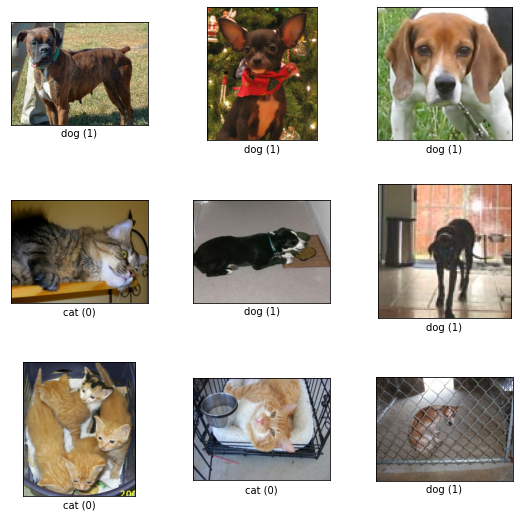

In [11]:
fig = tfds.show_examples(ds_train, ds_info_train)

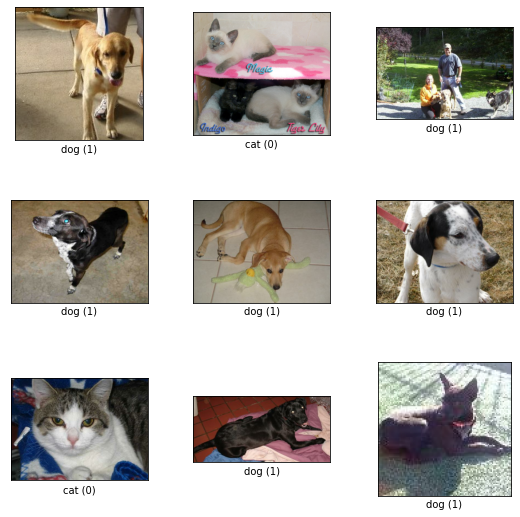

In [12]:
fig = tfds.show_examples(ds_test, ds_info_test)

---
## 2. ResNet-34, ResNet-50 Complete Model
- ResNet-18, 34, 50, 101, 152 다섯 가지 네트워크 중 34, 50 네트워크 구현

In [13]:
res_input_layer = keras.layers.Input(shape=(224,224,3))

### 2-1. ResNet-34

In [14]:
# resnet_34
def resnet_34(input_layer):
    x = input_layer
    
    # conv1
    x = keras.layers.Conv2D(64,(7,7), strides=(2,2), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.MaxPool2D(pool_size=(3,3),strides=2)(x)
    shortcut = x

    # conv2
    x = keras.layers.Conv2D(64,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(64,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Add()([x,shortcut])
    x = keras.layers.Activation('relu')(x)
    shortcut = x
    
    x = keras.layers.Conv2D(64,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(64,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Add()([x,shortcut])
    x = keras.layers.Activation('relu')(x)
    shortcut = x

    x = keras.layers.Conv2D(64,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(64,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Add()([x,shortcut])
    x = keras.layers.Activation('relu')(x)
        
    # conv3
    shortcut = keras.layers.Conv2D(128,(1,1), strides=(2,2), padding='valid')(x) # 패딩하지 않음
    shortcut = keras.layers.BatchNormalization()(shortcut)
    
    x = keras.layers.Conv2D(128,(3,3), strides=(2,2), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(128,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Add()([x,shortcut])
    x = keras.layers.Activation('relu')(x)
    shortcut = x

    x = keras.layers.Conv2D(128,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(128,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Add()([x,shortcut])
    x = keras.layers.Activation('relu')(x)
    shortcut = x

    x = keras.layers.Conv2D(128,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(128,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Add()([x,shortcut])
    x = keras.layers.Activation('relu')(x)
    shortcut = x

    x = keras.layers.Conv2D(128,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(128,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Add()([x,shortcut])
    x = keras.layers.Activation('relu')(x)

    # conv4
    shortcut = keras.layers.Conv2D(256,(1,1), strides=(2,2), padding='valid')(x) # 패딩하지 않음
    shortcut = keras.layers.BatchNormalization()(shortcut)
    
    x = keras.layers.Conv2D(256,(3,3), strides=(2,2), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(256,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Add()([x,shortcut])
    x = keras.layers.Activation('relu')(x)
    shortcut = x
    
    x = keras.layers.Conv2D(256,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(256,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Add()([x,shortcut])
    x = keras.layers.Activation('relu')(x)
    shortcut = x
    

    x = keras.layers.Conv2D(256,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(256,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Add()([x,shortcut])
    x = keras.layers.Activation('relu')(x)
    shortcut = x
    

    x = keras.layers.Conv2D(256,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(256,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Add()([x,shortcut])
    x = keras.layers.Activation('relu')(x)
    shortcut = x

    x = keras.layers.Conv2D(256,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(256,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Add()([x,shortcut])
    x = keras.layers.Activation('relu')(x)
    shortcut = x
    
    x = keras.layers.Conv2D(256,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(256,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Add()([x,shortcut])
    x = keras.layers.Activation('relu')(x)
    
    # conv5
    shortcut = keras.layers.Conv2D(512,(1,1), strides=(2,2), padding='valid')(x) # 패딩하지 않음
    shortcut = keras.layers.BatchNormalization()(shortcut)
    
    x = keras.layers.Conv2D(512,(3,3), strides=(2,2), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(512,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Add()([x,shortcut])
    x = keras.layers.Activation('relu')(x)
    shortcut = x

    x = keras.layers.Conv2D(512,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(512,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Add()([x,shortcut])
    x = keras.layers.Activation('relu')(x)
    shortcut = x

    x = keras.layers.Conv2D(512,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(512,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Add()([x,shortcut])
    x = keras.layers.Activation('relu')(x)

    # avg pool
    x = keras.layers.GlobalAvgPool2D()(x)
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(2,activation='softmax')(x)

    model = keras.Model(inputs = input_layer, outputs = x)
    return model

In [15]:
resnet_34(res_input_layer).summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 112, 112, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 112, 112, 64) 256         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 112, 112, 64) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

### 2-2. ResNet-50

In [16]:
# resnet_50
def resnet_50(input_layer):
    x = input_layer
    
    # conv1
    x = keras.layers.ZeroPadding2D((3,3))(x)
    x = keras.layers.Conv2D(64,(7,7), strides=(2,2), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.ZeroPadding2D((1,1))(x)
    x = keras.layers.MaxPool2D(pool_size=(3,3),strides=2)(x)
    
    
    shortcut = keras.layers.Conv2D(256,(1,1), padding='valid')(x) # 패딩하지 않음
    shortcut = keras.layers.BatchNormalization()(shortcut)
#     print(shortcut)
#     print(x)
    
    
    # conv2
    x = keras.layers.Conv2D(64,(1,1), padding='valid')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(64,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(256,(1,1), padding='valid')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Add()([x,shortcut])
    x = keras.layers.Activation('relu')(x)
    shortcut = x

    x = keras.layers.Conv2D(64,(1,1), padding='valid')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(64,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(256,(1,1), padding='valid')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Add()([x,shortcut])
    x = keras.layers.Activation('relu')(x)
    shortcut = x

    x = keras.layers.Conv2D(64,(1,1), padding='valid')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(64,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(256,(1,1), padding='valid')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Add()([x,shortcut])
    x = keras.layers.Activation('relu')(x)
    shortcut = x

        
    # conv3
    shortcut = keras.layers.Conv2D(512,(1,1), strides=(2,2), padding='valid')(shortcut) # 패딩하지 않음
    shortcut = keras.layers.BatchNormalization()(shortcut)
    
    x = keras.layers.Conv2D(128,(1,1), strides=(2,2), padding='valid')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(128,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(512,(1,1), padding='valid')(x)
    x = keras.layers.BatchNormalization()(x)
    
    x = keras.layers.Add()([x,shortcut])
    x = keras.layers.Activation('relu')(x)
    shortcut = x

    x = keras.layers.Conv2D(128,(1,1), padding='valid')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(128,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(512,(1,1), padding='valid')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Add()([x,shortcut])
    x = keras.layers.Activation('relu')(x)
    shortcut = x


    x = keras.layers.Conv2D(128,(1,1), padding='valid')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(128,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(512,(1,1), padding='valid')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Add()([x,shortcut])
    x = keras.layers.Activation('relu')(x)
    shortcut = x


    x = keras.layers.Conv2D(128,(1,1), padding='valid')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(128,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(512,(1,1), padding='valid')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Add()([x,shortcut])
    x = keras.layers.Activation('relu')(x)


    # conv4
    shortcut = keras.layers.Conv2D(1024,(1,1), strides=(2,2), padding='valid')(x) # 패딩하지 않음
    shortcut = keras.layers.BatchNormalization()(shortcut)
    
    x = keras.layers.Conv2D(256,(1,1), strides=(2,2), padding='valid')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(256,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(1024,(1,1), padding='valid')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Add()([x,shortcut])
    x = keras.layers.Activation('relu')(x)
    shortcut = x
    
    x = keras.layers.Conv2D(256,(1,1), padding='valid')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(256,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(1024,(1,1), padding='valid')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Add()([x,shortcut])
    x = keras.layers.Activation('relu')(x)
    shortcut = x
    

    x = keras.layers.Conv2D(256,(1,1), padding='valid')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(256,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(1024,(1,1), padding='valid')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Add()([x,shortcut])
    x = keras.layers.Activation('relu')(x)
    shortcut = x
    

    x = keras.layers.Conv2D(256,(1,1), padding='valid')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(256,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(1024,(1,1), padding='valid')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Add()([x,shortcut])
    x = keras.layers.Activation('relu')(x)
    shortcut = x

    x = keras.layers.Conv2D(256,(1,1), padding='valid')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(256,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(1024,(1,1), padding='valid')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Add()([x,shortcut])
    x = keras.layers.Activation('relu')(x)
    shortcut = x
    
    x = keras.layers.Conv2D(256,(1,1), padding='valid')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(256,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(1024,(1,1), padding='valid')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Add()([x,shortcut])
    x = keras.layers.Activation('relu')(x)


    
    # conv5
    shortcut = keras.layers.Conv2D(2048,(1,1), strides=(2,2), padding='valid')(x) # 패딩하지 않음
    shortcut = keras.layers.BatchNormalization()(shortcut)
    
    x = keras.layers.Conv2D(512,(1,1), strides=(2,2), padding='valid')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(512,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(2048,(1,1), padding='valid')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Add()([x,shortcut])
    x = keras.layers.Activation('relu')(x)
    shortcut = x

    x = keras.layers.Conv2D(512,(1,1), padding='valid')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(512,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(2048,(1,1), padding='valid')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Add()([x,shortcut])
    x = keras.layers.Activation('relu')(x)
    shortcut = x


    x = keras.layers.Conv2D(512,(1,1), padding='valid')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(512,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(2048,(1,1), padding='valid')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Add()([x,shortcut])
    x = keras.layers.Activation('relu')(x)

    # avg pool
    x = keras.layers.GlobalAvgPool2D()(x)
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(2,activation='softmax')(x)

    model = keras.Model(inputs = input_layer, outputs = x)
    return model

In [17]:
resnet_50(res_input_layer).summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_36 (Conv2D)              (None, 115, 115, 64) 9472        zero_padding2d[0][0]             
__________________________________________________________________________________________________
batch_normalization_36 (BatchNo (None, 115, 115, 64) 256         conv2d_36[0][0]                  
____________________________________________________________________________________________

---
## 3. 일반 네트워크(plain network) 만들기
- 블록 코드 수정하기 (skip connection 제거)

### 3-1. plain 34

In [18]:
# plain 34
def plain_34(input_layer):
    
    x = input_layer
    
    # conv1
    x = keras.layers.Conv2D(64,(7,7), strides=(2,2), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.MaxPool2D(pool_size=(3,3),strides=2)(x)

    # conv2
    x = keras.layers.Conv2D(64,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)

    x = keras.layers.Conv2D(64,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)

    x = keras.layers.Conv2D(64,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)

    x = keras.layers.Conv2D(64,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)

    x = keras.layers.Conv2D(64,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)

    x = keras.layers.Conv2D(64,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)

    # conv3
    x = keras.layers.Conv2D(128,(3,3), strides=(2,2), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)

    x = keras.layers.Conv2D(128,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)

    x = keras.layers.Conv2D(128,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)

    x = keras.layers.Conv2D(128,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)

    x = keras.layers.Conv2D(128,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)

    x = keras.layers.Conv2D(128,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)

    x = keras.layers.Conv2D(128,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)

    
    x = keras.layers.Conv2D(128,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    
    # conv4

    x = keras.layers.Conv2D(256,(3,3), strides=(2,2), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)

    x = keras.layers.Conv2D(256,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)

    x = keras.layers.Conv2D(256,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)

    x = keras.layers.Conv2D(256,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)

    x = keras.layers.Conv2D(256,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)

    x = keras.layers.Conv2D(256,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)

    x = keras.layers.Conv2D(256,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)

    x = keras.layers.Conv2D(256,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)

    x = keras.layers.Conv2D(256,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)

    x = keras.layers.Conv2D(256,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)

    x = keras.layers.Conv2D(256,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)

    x = keras.layers.Conv2D(256,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)

    # conv5

    x = keras.layers.Conv2D(512,(3,3), strides=(2,2), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)

    x = keras.layers.Conv2D(512,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)

    x = keras.layers.Conv2D(512,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)

    x = keras.layers.Conv2D(512,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)

    x = keras.layers.Conv2D(512,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)

    x = keras.layers.Conv2D(512,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)

    # avg pool
    x = keras.layers.GlobalAvgPool2D()(x)
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(2,activation='softmax')(x)


    model = keras.Model(inputs = input_layer, outputs = x)
    return model


In [19]:
plain_34(res_input_layer).summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 112, 112, 64)      9472      
_________________________________________________________________
batch_normalization_89 (Batc (None, 112, 112, 64)      256       
_________________________________________________________________
activation_82 (Activation)   (None, 112, 112, 64)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 55, 55, 64)        36928     
_________________________________________________________________
batch_normalization_90 (Batc (None, 55, 55, 64)        256 

### 3-2. plain 50

In [20]:
# plain_50
def plain_50(input_layer):
    x = input_layer
    
    # conv1
    x = keras.layers.ZeroPadding2D((3,3))(x)
    x = keras.layers.Conv2D(64,(7,7), strides=(2,2), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.ZeroPadding2D((1,1))(x)
    x = keras.layers.MaxPool2D(pool_size=(3,3),strides=2)(x)
    
    # conv2
    x = keras.layers.Conv2D(64,(1,1), padding='valid')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(64,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(256,(1,1), padding='valid')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)

    x = keras.layers.Conv2D(64,(1,1), padding='valid')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(64,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(256,(1,1), padding='valid')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)


    x = keras.layers.Conv2D(64,(1,1), padding='valid')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(64,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(256,(1,1), padding='valid')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)

        
    # conv3
    x = keras.layers.Conv2D(128,(1,1), strides=(2,2), padding='valid')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(128,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(512,(1,1), padding='valid')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)

    x = keras.layers.Conv2D(128,(1,1), padding='valid')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(128,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(512,(1,1), padding='valid')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)

    x = keras.layers.Conv2D(128,(1,1), padding='valid')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(128,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(512,(1,1), padding='valid')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)

    x = keras.layers.Conv2D(128,(1,1), padding='valid')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(128,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(512,(1,1), padding='valid')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)

    # conv4
    x = keras.layers.Conv2D(256,(1,1), strides=(2,2), padding='valid')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(256,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(1024,(1,1), padding='valid')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    
    x = keras.layers.Conv2D(256,(1,1), padding='valid')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(256,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(1024,(1,1), padding='valid')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    

    x = keras.layers.Conv2D(256,(1,1), padding='valid')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(256,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(1024,(1,1), padding='valid')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    

    x = keras.layers.Conv2D(256,(1,1), padding='valid')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(256,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(1024,(1,1), padding='valid')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)


    x = keras.layers.Conv2D(256,(1,1), padding='valid')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(256,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(1024,(1,1), padding='valid')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)

    
    x = keras.layers.Conv2D(256,(1,1), padding='valid')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(256,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(1024,(1,1), padding='valid')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)


    # conv5
    x = keras.layers.Conv2D(512,(1,1), strides=(2,2), padding='valid')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(512,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(2048,(1,1), padding='valid')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)

    x = keras.layers.Conv2D(512,(1,1), padding='valid')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(512,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(2048,(1,1), padding='valid')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)


    x = keras.layers.Conv2D(512,(1,1), padding='valid')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(512,(3,3), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Conv2D(2048,(1,1), padding='valid')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)

    # avg pool
    x = keras.layers.GlobalAvgPool2D()(x)
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(2,activation='softmax')(x)

    model = keras.Model(inputs = input_layer, outputs = x)
    return model

In [21]:
plain_50(res_input_layer).summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 230, 230, 3)       0         
_________________________________________________________________
conv2d_122 (Conv2D)          (None, 115, 115, 64)      9472      
_________________________________________________________________
batch_normalization_122 (Bat (None, 115, 115, 64)      256       
_________________________________________________________________
activation_115 (Activation)  (None, 115, 115, 64)      0         
_________________________________________________________________
zero_padding2d_3 (ZeroPaddin (None, 117, 117, 64)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 58, 58, 64)        0   

---
## 4. 학습하기

In [22]:
BATCH_SIZE = 16
EPOCH = 20

In [23]:
input_layer = keras.layers.Input(shape=(224,224,3))

model_res_34 = resnet_34(input_layer)
model_res_50 = resnet_50(input_layer)
model_plain_34 = plain_34(input_layer)
model_plain_50 = plain_50(input_layer)

In [24]:
ds_train = apply_normalize_on_dataset(ds_train, batch_size=BATCH_SIZE)

In [25]:
ds_test = apply_normalize_on_dataset(ds_test, batch_size=BATCH_SIZE)

In [26]:
model_res_34.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.01, clipnorm=1.),
    metrics=['accuracy'],
)

history_resnet_34 = model_res_34.fit(
    ds_train,
    steps_per_epoch=int(ds_info.splits['train[:80%]'].num_examples/BATCH_SIZE),
    validation_steps=int(ds_info.splits['train[80%:]'].num_examples/BATCH_SIZE),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
)

/home/bckang/.pyenv/versions/3.8.5/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/20
1163/1163 [==============================] - 87s 68ms/step - loss: 0.6618 - accuracy: 0.6131 - val_loss: 0.8642 - val_accuracy: 0.5166
Epoch 2/20
1163/1163 [==============================] - 78s 67ms/step - loss: 0.6050 - accuracy: 0.6663 - val_loss: 0.7848 - val_accuracy: 0.5752
Epoch 3/20
1163/1163 [==============================] - 78s 67ms/step - loss: 0.5349 - accuracy: 0.7331 - val_loss: 1.6313 - val_accuracy: 0.5328
Epoch 4/20
1163/1163 [==============================] - 78s 67ms/step - loss: 0.4707 - accuracy: 0.7751 - val_loss: 0.4671 - val_accuracy: 0.7711
Epoch 5/20
1163/1163 [==============================] - 78s 67ms/step - loss: 0.3867 - accuracy: 0.8260 - val_loss: 0.8177 - val_accuracy: 0.6534
Epoch 6/20
1163/1163 [==============================] - 78s 67ms/step - loss: 0.3175 - accuracy: 0.8628 - val_loss: 0.4375 - val_accuracy: 0.8067
Epoch 7/20
1163/1163 [==============================] - 78s 67ms/step - loss: 0.2322 - accuracy: 0.9012 - val_loss: 0.4039 -

In [27]:
h_resnet_34 = [
[0.7183, 0.5929, 1.7381, 0.5209],
[0.6112, 0.6678, 0.9815, 0.5613],
[0.5610, 0.7187, 0.7899, 0.6420],
[0.4943, 0.7606, 0.9503, 0.5744],
[0.4112, 0.8101, 0.5154, 0.7754],
[0.3481, 0.8511, 1.1424, 0.6598],
[0.2612, 0.8903, 0.5718, 0.7927],
[0.1625, 0.9357, 0.5929, 0.8324],
[0.1150, 0.9562, 0.7951, 0.8190],
[0.0672, 0.9750, 1.0594, 0.7791],
[0.0473, 0.9812, 0.6981, 0.8366],
[0.0407, 0.9870, 0.7416, 0.8456],
[0.0205, 0.9929, 0.7807, 0.8462],
[0.0113, 0.9956, 0.8059, 0.8391],
[0.0094, 0.9967, 0.8080, 0.8537],
[0.0072, 0.9972, 0.8489, 0.8606],
[0.0042, 0.9987, 0.8416, 0.8572],
[0.0020, 0.9993, 0.9689, 0.8499],
[0.0025, 0.9994, 0.8263, 0.8654],
[8.9776e-04, 0.9998, 0.8770, 0.8642]
]

history_resnet_34 = {'loss': [], 'accuracy': [],'val_loss': [], 'val_accuracy': []}                    
for i in range(20):
    history_resnet_34['loss'].append(h_resnet_34[i][0])
    history_resnet_34['accuracy'].append(h_resnet_34[i][1])    
    history_resnet_34['val_loss'].append(h_resnet_34[i][2])    
    history_resnet_34['val_accuracy'].append(h_resnet_34[i][3])    

history_resnet_34['loss']

[0.7183,
 0.6112,
 0.561,
 0.4943,
 0.4112,
 0.3481,
 0.2612,
 0.1625,
 0.115,
 0.0672,
 0.0473,
 0.0407,
 0.0205,
 0.0113,
 0.0094,
 0.0072,
 0.0042,
 0.002,
 0.0025,
 0.00089776]

In [28]:
model_res_50.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.01, clipnorm=1.),
    metrics=['accuracy'],
)

history_resnet_50 = model_res_50.fit(
    ds_train,
    steps_per_epoch=int(ds_info.splits['train[:80%]'].num_examples/BATCH_SIZE),
    validation_steps=int(ds_info.splits['train[80%:]'].num_examples/BATCH_SIZE),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
)

Epoch 1/20
1163/1163 [==============================] - 149s 122ms/step - loss: 0.7177 - accuracy: 0.5721 - val_loss: 0.8762 - val_accuracy: 0.5649
Epoch 2/20
1163/1163 [==============================] - 142s 122ms/step - loss: 0.6843 - accuracy: 0.6067 - val_loss: 0.9906 - val_accuracy: 0.5179
Epoch 3/20
1163/1163 [==============================] - 141s 122ms/step - loss: 0.6703 - accuracy: 0.6201 - val_loss: 1.5120 - val_accuracy: 0.5589
Epoch 4/20
1163/1163 [==============================] - 141s 122ms/step - loss: 0.6619 - accuracy: 0.6268 - val_loss: 0.7560 - val_accuracy: 0.5800
Epoch 5/20
1163/1163 [==============================] - 141s 122ms/step - loss: 0.6520 - accuracy: 0.6368 - val_loss: 1.1438 - val_accuracy: 0.5380
Epoch 6/20
1163/1163 [==============================] - 142s 122ms/step - loss: 0.6422 - accuracy: 0.6450 - val_loss: 0.6718 - val_accuracy: 0.6376
Epoch 7/20
1163/1163 [==============================] - 141s 121ms/step - loss: 0.6361 - accuracy: 0.6498 - val_

In [29]:
h_resnet_50 = [
[0.6794, 0.6021, 0.8557, 0.5477],
[0.6771, 0.6077, 0.7557, 0.5705],
[0.6599, 0.6270, 0.8560, 0.5699],
[0.6411, 0.6455, 1.0810, 0.5192],
[0.6403, 0.6513, 0.6628, 0.6225],
[0.6229, 0.6623, 1.1846, 0.5631],
[0.6005, 0.6827, 0.5926, 0.6933],
[0.5873, 0.6934, 0.7289, 0.6050],
[0.5813, 0.6928, 0.5821, 0.6935],
[0.5561, 0.7193, 0.6466, 0.7047],
[0.5192, 0.7460, 0.5258, 0.7496],
[0.4910, 0.7651, 0.7099, 0.6578],
[0.4549, 0.7877, 0.5642, 0.7444],
[0.4131, 0.8149, 0.7383, 0.6953],
[0.3699, 0.8345, 0.9301, 0.6534],
[0.3137, 0.8647, 0.6103, 0.7593],
[0.2564, 0.8927, 0.8876, 0.7243],
[0.2036, 0.9182, 0.9631, 0.7274],
[0.1601, 0.9384, 0.9631, 0.7573],
[0.1165, 0.9525, 0.7355, 0.7996]
]

history_resnet_50 = {'loss': [], 'accuracy': [],'val_loss': [], 'val_accuracy': []}                    
for i in range(20):
    history_resnet_50['loss'].append(h_resnet_50[i][0])
    history_resnet_50['accuracy'].append(h_resnet_50[i][1])    
    history_resnet_50['val_loss'].append(h_resnet_50[i][2])    
    history_resnet_50['val_accuracy'].append(h_resnet_50[i][3])  

In [30]:
model_plain_34.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.01, clipnorm=1.),
    metrics=['accuracy'],
)

history_plain_34 = model_plain_34.fit(
    ds_train,
    steps_per_epoch=int(ds_info.splits['train[:80%]'].num_examples/BATCH_SIZE),
    validation_steps=int(ds_info.splits['train[80%:]'].num_examples/BATCH_SIZE),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
)

Epoch 1/20
1163/1163 [==============================] - 77s 63ms/step - loss: 0.7000 - accuracy: 0.5217 - val_loss: 0.8050 - val_accuracy: 0.5332
Epoch 2/20
1163/1163 [==============================] - 73s 63ms/step - loss: 0.6866 - accuracy: 0.5529 - val_loss: 0.8973 - val_accuracy: 0.5164
Epoch 3/20
1163/1163 [==============================] - 73s 63ms/step - loss: 0.6799 - accuracy: 0.5756 - val_loss: 0.6671 - val_accuracy: 0.5949
Epoch 4/20
1163/1163 [==============================] - 73s 63ms/step - loss: 0.6721 - accuracy: 0.5897 - val_loss: 0.7291 - val_accuracy: 0.5779
Epoch 5/20
1163/1163 [==============================] - 73s 63ms/step - loss: 0.6571 - accuracy: 0.6112 - val_loss: 0.7905 - val_accuracy: 0.5349
Epoch 6/20
1163/1163 [==============================] - 73s 63ms/step - loss: 0.6352 - accuracy: 0.6376 - val_loss: 0.7025 - val_accuracy: 0.5718
Epoch 7/20
1163/1163 [==============================] - 73s 63ms/step - loss: 0.6165 - accuracy: 0.6576 - val_loss: 0.5922 -

In [31]:
h_plain_34 = [
    [0.7077, 0.5327, 1.0329, 0.5351],
    [0.6973, 0.5284, 1.1648, 0.5164],
    [0.6598, 0.6054, 0.7900, 0.5384],
    [0.6509, 0.6206, 0.6507, 0.6303],
    [0.6400, 0.6300, 0.6700, 0.6200],
    [0.6315, 0.6392, 0.6963, 0.6111],
    [0.6139, 0.6590, 0.7864, 0.6110],
    [0.5877, 0.6839, 0.6003, 0.6976],
    [0.5535, 0.7150, 0.5412, 0.7317],
    [0.5097, 0.7427, 0.4551, 0.7899],
    [0.4633, 0.7764, 0.5005, 0.7588],
    [0.4136, 0.8151, 0.4044, 0.8149],
    [0.3581, 0.8442, 0.4357, 0.8097],
    [0.3126, 0.8661, 0.4068, 0.8138],
    [0.2725, 0.8884, 0.4083, 0.8252],
    [0.2314, 0.9056, 0.4621, 0.8199],
    [0.1900, 0.9205, 0.4434, 0.8147],
    [0.1501, 0.9411, 0.3356, 0.8760],
    [0.1218, 0.9548, 0.6391, 0.8341],
    [0.0923, 0.9671, 0.4248, 0.8714]
]

history_plain_34 = {'loss': [], 'accuracy': [],'val_loss': [], 'val_accuracy': []}                    
for i in range(20):
    history_plain_34['loss'].append(h_plain_34[i][0])
    history_plain_34['accuracy'].append(h_plain_34[i][1])    
    history_plain_34['val_loss'].append(h_plain_34[i][2])    
    history_plain_34['val_accuracy'].append(h_plain_34[i][3])  

In [32]:
model_plain_50.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.01, clipnorm=1.),
    metrics=['accuracy'],
)

history_plain_50 = model_plain_50.fit(
    ds_train,
    steps_per_epoch=int(ds_info.splits['train[:80%]'].num_examples/BATCH_SIZE),
    validation_steps=int(ds_info.splits['train[80%:]'].num_examples/BATCH_SIZE),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
)

Epoch 1/20
1163/1163 [==============================] - 125s 102ms/step - loss: 0.7109 - accuracy: 0.5258 - val_loss: 1.1187 - val_accuracy: 0.4657
Epoch 2/20
1163/1163 [==============================] - 119s 102ms/step - loss: 0.7093 - accuracy: 0.5220 - val_loss: 0.9335 - val_accuracy: 0.5237
Epoch 3/20
1163/1163 [==============================] - 119s 102ms/step - loss: 0.7090 - accuracy: 0.5121 - val_loss: 0.7129 - val_accuracy: 0.5242
Epoch 4/20
1163/1163 [==============================] - 118s 102ms/step - loss: 0.7094 - accuracy: 0.5071 - val_loss: 0.7116 - val_accuracy: 0.5358
Epoch 5/20
1163/1163 [==============================] - 119s 102ms/step - loss: 0.6992 - accuracy: 0.5395 - val_loss: 1.1013 - val_accuracy: 0.5656
Epoch 6/20
1163/1163 [==============================] - 119s 102ms/step - loss: 0.6920 - accuracy: 0.5601 - val_loss: 0.6777 - val_accuracy: 0.5774
Epoch 7/20
1163/1163 [==============================] - 119s 102ms/step - loss: 0.6765 - accuracy: 0.5876 - val_

---
#### 5. 시각화 및 결과 비교

##### 5-1. test 결과 


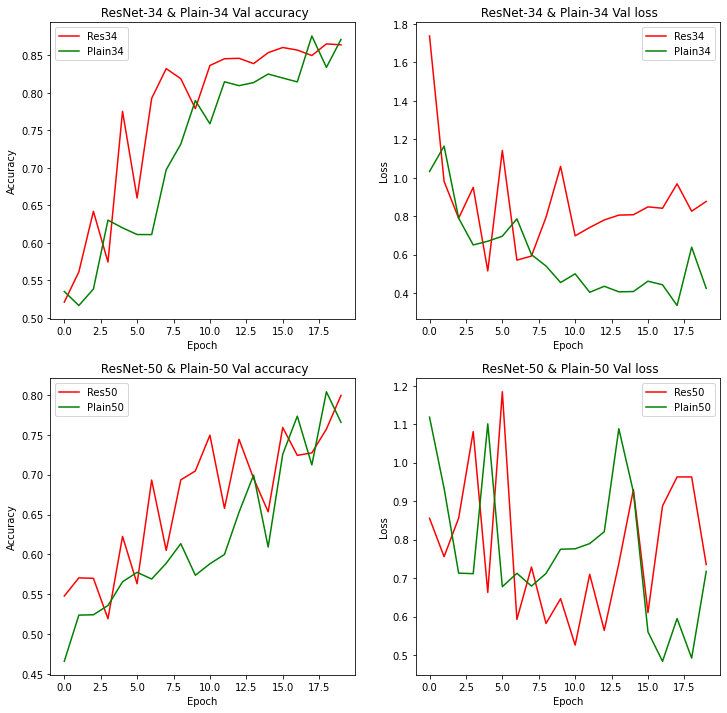

In [33]:
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.plot(history_resnet_34['val_accuracy'], 'r')
plt.plot(history_plain_34['val_accuracy'], 'g')
plt.title(' ResNet-34 & Plain-34 Val accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Res34', 'Plain34'])

plt.subplot(2, 2, 2)
plt.plot(history_resnet_34['val_loss'], 'r')
plt.plot(history_plain_34['val_loss'], 'g')
plt.title(' ResNet-34 & Plain-34 Val loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Res34', 'Plain34'])

plt.subplot(2, 2, 3)
plt.plot(history_resnet_50['val_accuracy'], 'r')
plt.plot(history_plain_50.history['val_accuracy'], 'g')
plt.title(' ResNet-50 & Plain-50 Val accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Res50', 'Plain50'])

plt.subplot(2, 2, 4)
plt.plot(history_resnet_50['val_loss'], 'r')
plt.plot(history_plain_50.history['val_loss'], 'g')
plt.title(' ResNet-50 & Plain-50 Val loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Res50', 'Plain50'])

plt.show()

### 5-2. Train Loss

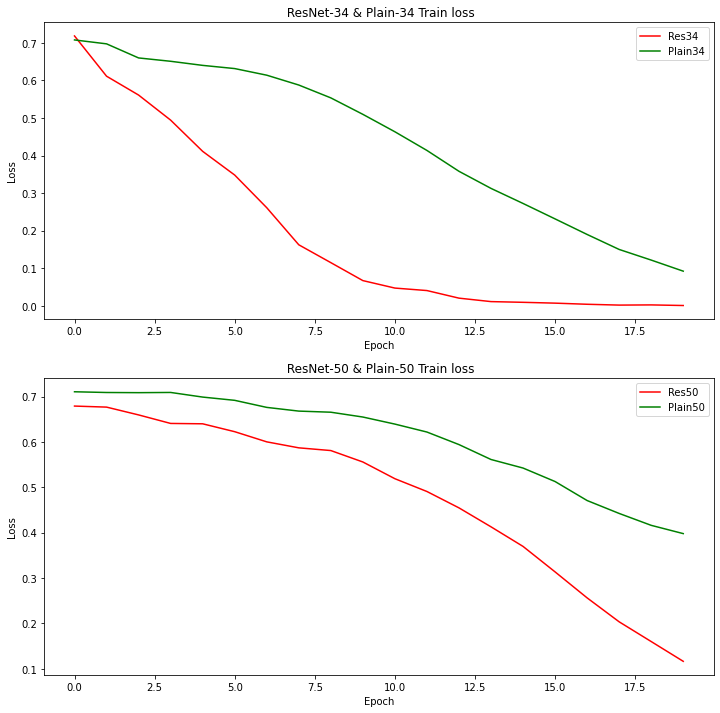

In [34]:
plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)
plt.plot(history_resnet_34['loss'], 'r')
plt.plot(history_plain_34['loss'], 'g')
plt.title(' ResNet-34 & Plain-34 Train loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Res34', 'Plain34'])

plt.subplot(2, 1, 2)
plt.plot(history_resnet_50['loss'], 'r')
plt.plot(history_plain_50.history['loss'], 'g')
plt.title(' ResNet-50 & Plain-50 Train loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Res50', 'Plain50'])

plt.show()

### 5-3. Train Loss (2)



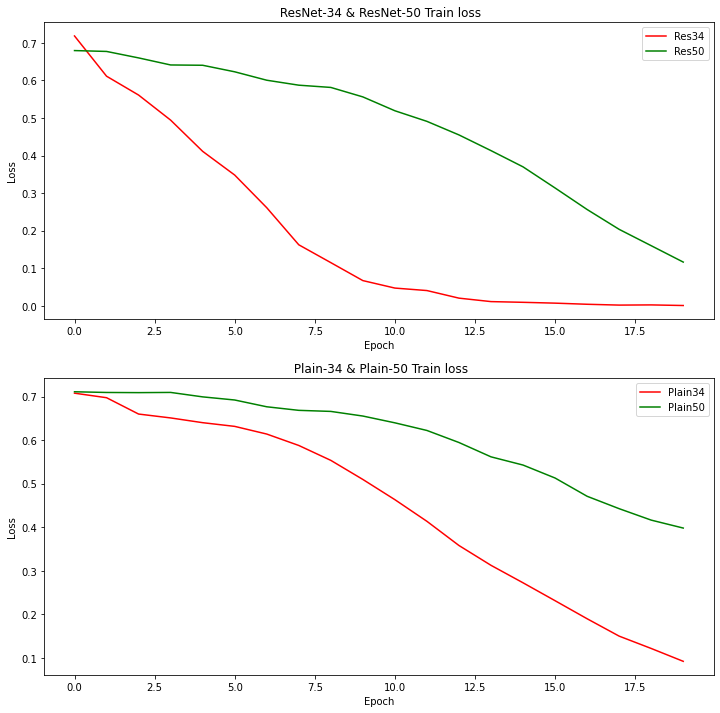

In [35]:
plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)
plt.plot(history_resnet_34['loss'], 'r')
plt.plot(history_resnet_50['loss'], 'g')
plt.title(' ResNet-34 & ResNet-50 Train loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Res34', 'Res50'])

plt.subplot(2, 1, 2)
plt.plot(history_plain_34['loss'], 'r')
plt.plot(history_plain_50.history['loss'], 'g')
plt.title(' Plain-34 & Plain-50 Train loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Plain34', 'Plain50'])

plt.show()

### 5-4. Train Accuracy


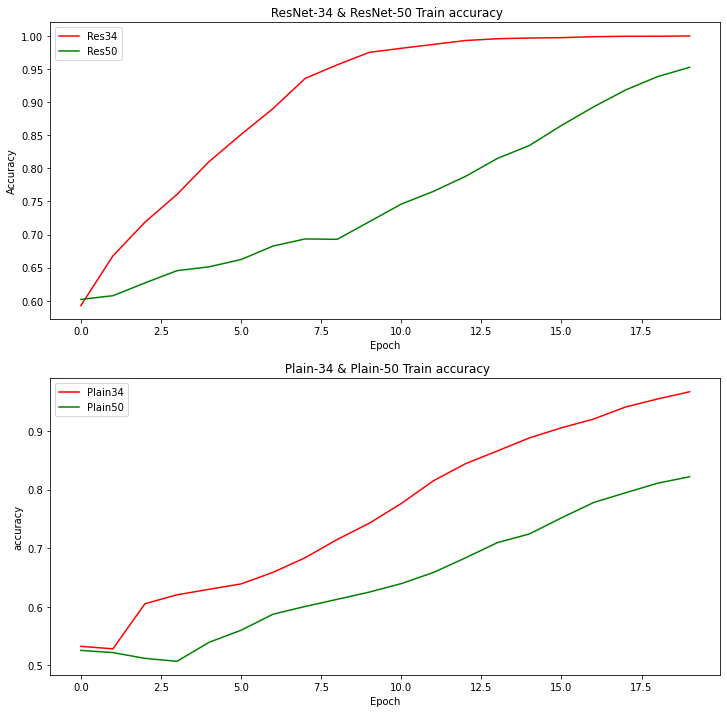

In [36]:
plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)
plt.plot(history_resnet_34['accuracy'], 'r')
plt.plot(history_resnet_50['accuracy'], 'g')
plt.title(' ResNet-34 & ResNet-50 Train accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Res34', 'Res50'])

plt.subplot(2, 1, 2)
plt.plot(history_plain_34['accuracy'], 'r')
plt.plot(history_plain_50.history['accuracy'], 'g')
plt.title(' Plain-34 & Plain-50 Train accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Plain34', 'Plain50'])

plt.show()

---

## 6. 회고

- 개념적인 부분은 이해를 하였으나 실제 구현시 이미지 로드 및 전처리 등에 시간이 소요됨. 좀 더 파이썬과 친해져야 할것 같다고 생각함<br>
- 중간에 skip connection을 두어 잔차에 대한 변화에 대한 계산만을 수행하게 하여 Vanishing Gradient 가능성을 낮추고 깊은 레이어를 둘 수 있도록 함<br>
- 이미지 처리에서 깊은 층을 두고 계산을 수행할 수 있게 되어 다양한 에측의 적중률을 더 높이는 계기가 되었다고 생각됨.<br>
- Resnet 50으로 층을 폰일 경우 좀 더 낮은 Loss를 보여줌<br>
- 모듈화하여 처리하고자 하였으나 내용확인과 정리등에 많은 시간이 소요되어 모듈화 등 재작성을 수행하지 못함 <br>
- 내용 확인을 위하여 참고소스에 대한 분석과 파악을 중심으로 진행하였음
<br>

- 참고 <br>
  . https://github.com/onlybooks/pytorch/blob/master/p1ch5/1_parameter_estimation.ipynb

 
  
  
  